In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.3.2'

## Loading data

In [3]:
# Pandas supports multiple file formats for data loading
# CSV files are common but can be larger in size

coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')

# Parquet format is more efficient than CSV - smaller file size and faster loading
# It also preserves data types better than CSV
results = pd.read_parquet('https://github.com/KeithGalli/complete-pandas-tutorial/raw/refs/heads/master/data/results.parquet')

In [4]:
results.head(3)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None


In [5]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


## Accessing data

In [6]:
# Access a single row by label/index using .loc
coffee.loc[0]  # Get the first row (index 0)

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

In [7]:
# Access multiple specific rows by passing a list of indices
coffee.loc[[0, 1, 5]]  # Get rows at indices 0, 1, and 5

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
5,Wednesday,Latte,25


In [8]:
# Access specific rows and columns using .loc with slice notation
# Syntax: .loc[row_indexer, column_indexer]
coffee.loc[5:12, ["Day", "Units Sold"]]  # Rows 5-12, only "Day" and "Units Sold" columns

,Day,Units Sold
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35
10,Saturday,45
11,Saturday,35
12,Sunday,45


In [9]:
# .iloc uses integer position-based indexing (not label-based like .loc)
coffee.iloc[:3, :2]  # First 3 rows, first 2 columns by position

,Day,Coffee Type
0,Monday,Espresso
1,Monday,Latte
2,Tuesday,Espresso


In [10]:
# Modify individual cell values using .loc
coffee.loc[0, "Units Sold"] = 10  # Set Units Sold for first row to 10
coffee.loc[0, "Units Sold"] = 25  # Update the same cell to 25

# Display first 3 rows to verify the modification
coffee.head(3)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30


In [11]:
# Sort DataFrame by multiple columns in descending order
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=False)

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
4,Wednesday,Espresso,35
7,Thursday,Latte,30
2,Tuesday,Espresso,30


In [12]:
# Sort with different ascending/descending order for each column
# ascending=[False, True] means: Units Sold descending, Coffee Type ascending
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=[0, 1])

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


## Filtering data

In [13]:
# Load olympics data for filtering examples
bios = pd.read_csv('https://github.com/KeithGalli/complete-pandas-tutorial/raw/refs/heads/master/data/bios.csv')

In [14]:
# Display dataset information (data types, null values, memory usage)
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [15]:
# METHOD 1: Filtering using .loc (RECOMMENDED)
# ✅ Explicit — it’s clear you’re doing label-based indexing.
# ✅ More consistent (works well with both filtering rows and selecting columns in one step).
# ✅ Recommended by pandas docs for clarity and avoiding ambiguity.
# 🚀 Most common in production code / tutorials because it’s considered the “best practice”.

# Find people who are very tall (>210cm) but lightweight (<65kg)
# Use & for AND operation (parentheses required for proper precedence)
bios.loc[
      (bios['height_cm'] > 210) & (bios['weight_kg'] < 65),
      ["name", "born_country"]
    ]

,name,born_country
61710,Andrew Gooding,JAM


In [16]:
# METHOD 2: Filtering using bracket notation
# ✅ Shorter and a bit easier to write for quick work.
# ❌ Can be harder to read when you chain many operations.
# ❌ Less efficient in some cases (because it creates an intermediate DataFrame before selecting columns).
# ⚡ Common in notebooks, quick experiments, and among beginners.

# Same filter as above but using bracket notation
bios[(bios['height_cm'] > 210) & (bios['weight_kg'] < 65)][["name", "born_country"]]

,name,born_country
61710,Andrew Gooding,JAM


In [17]:
# Filter by country: Find all people born in Colombia
bios.loc[bios['born_country'] == 'COL', ["name", "born_date", "died_date","born_city", "born_region"]]

,name,born_date,died_date,born_city,born_region
1323,Eduardo Barragán,1951-07-01,NaN,Cartagena del Chairá,Caquetá
1325,Prudencio Cardona,1951-12-22,2019-08-04,San Basilio de Palenque,Bolívar
1326,Edwin Cassiani,1972-10-28,NaN,Palenque,Casanare
1327,Dairo Esalas,1975-01-17,NaN,San Onofre,Sucre
1330,Jorge Julio,1969-04-04,NaN,El Retén,Magdalena
...,...,...,...,...,...
138552,Daniel Elahi Galán,1996-06-18,NaN,Bucaramanga,Santander
138553,Jefferson Ochoa,1996-11-09,NaN,Santa Marta,Magdalena
138555,Brayan Rodallegas,1997-11-15,NaN,Villavicencio,Meta
138556,Julián Horta,1999-08-15,NaN,Puerto Camelia,Caquetá


In [18]:
# String filtering: Find names containing 'Julian' (case-insensitive)
# .str accessor allows string methods on pandas Series
bios.loc[bios['name'].str.contains('Julian', case=False),['name', 'born_country']]

,name,born_country
113,Julian Robertson,GBR
7404,Julian Rossi,NaN
8753,Julian Wheeler,USA
14021,Julian Dean,NZL
17442,Julian Pearce,IND
...,...,...
143786,Julian Venonsky,NaN
144191,Julian Lüftner,AUT
144549,Julian Jakobsen,DEN
144732,Julian Schmid,GER


In [19]:
# Combined string and exact match filtering
# Find people named 'Manuela' who were born in Italy
bios.loc[(bios['name'].str.contains('Manuela')) & (bios['born_country'] == 'ITA'),['name', 'born_city', 'born_country']]

,name,born_city,born_country
28475,Manuela Bocchini,Fano,ITA
48053,Manuela Carnini,Busto Arsizio,ITA
48054,Manuela Carosi,Roma,ITA
48066,Manuela Dalla Valle,Como,ITA
48080,Manuela Melchiorri,Roma,ITA
60617,Manuela Sossi,Trieste,ITA
80294,Manuela Di Centa,Paluzza,ITA
93789,Manuela Leggeri,Sezze,ITA
108064,Manuela Secolo,Treviso,ITA
109079,Manuela Friz,Agordo,ITA


## Adding / Removing Columns

In [20]:
# Create a copy to avoid modifying the original DataFrame (prevents name binding issues)
coffee_new = coffee.copy()

In [21]:
# Add a new column with a constant value for all rows
# Multiply list by number to repeat the value for all 14 rows
coffee_new['Price'] = 14 * [4.99]
coffee_new

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


In [22]:
# Import numpy for conditional operations
import numpy as np

# Add conditional column using np.where() for simple binary conditions
# np.where(condition, value_if_true, value_if_false)
coffee_new['Price'] = np.where(coffee['Coffee Type'] == 'Latte', 7.99, 4.99)
coffee_new

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,7.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,7.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,7.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,7.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,7.99


In [23]:
# Remove a column using drop()
# inplace=True modifies the DataFrame directly instead of returning a copy
coffee_new.drop(columns='Price', inplace=True)
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [24]:
# Re-add Price column with different values
coffee_new['Price'] = np.where(coffee_new['Coffee Type'] == 'Latte', 4.99, 3.99)
coffee_new

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,3.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,4.99


In [25]:
# Calculate new column based on existing columns
# Revenue = Units Sold × Price
coffee_new['Revenue'] = coffee_new['Units Sold'] * coffee_new['Price']
coffee_new

,Day,Coffee Type,Units Sold,Price,Revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,4.99,74.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,4.99,99.80
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,4.99,124.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,4.99,149.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,4.99,174.65


In [26]:
# Work with the bios dataset copy
bios_new = bios.copy()
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [27]:
# Convert string dates to datetime objects for better functionality
# pd.to_datetime() automatically parses common date formats
bios_new['born_date'] = pd.to_datetime(bios_new['born_date'])

In [28]:
# Verify the data type conversion
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 11.1+ MB


In [29]:
# Extract year from datetime using .dt accessor
# .dt provides access to datetime properties and methods
bios_new['born_year'] = bios_new['born_date'].dt.year

In [30]:
# Display relevant columns to verify the extraction
bios_new.loc[:, ['name', 'born_date', 'born_year']].head()

,name,born_date,born_year
0,Jean-François Blanchy,1886-12-12,1886.0
1,Arnaud Boetsch,1969-04-01,1969.0
2,Jean Borotra,1898-08-13,1898.0
3,Jacques Brugnon,1895-05-11,1895.0
4,Albert Canet,1878-04-17,1878.0


In [31]:
# AVOID: bios_new['height_category'] = bios_new['height_cm'].apply(lambda x: 'Short' if x < 165 else 'Average' if x < 185 else 'Tall')
# pd.apply() is NOT optimized for performance - it's essentially a Python loop

# PREFERRED: Use pd.cut() for efficient binning/categorization
# pd.cut() is vectorized and much faster than apply()
bios_new['height_category'] = pd.cut(
    bios_new['height_cm'],
    bins=[-np.inf, 165, 185, np.inf],  # Define bin boundaries
    labels=['Short', 'Average', 'Tall']  # Labels for each bin
)
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_year,height_category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886.0,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969.0,Average
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898.0,Average
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895.0,Average
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878.0,NaN


In [32]:
# For multi-variable conditions, use np.select() instead of nested np.where()
# pd.cut() is designed for single-variable binning, but this logic involves two variables
conditions = [
    (bios_new['height_cm'] < 175) & (bios_new['weight_kg'] < 70),  # Condition 1
    (bios_new['height_cm'] < 185) | (bios_new['weight_kg'] <= 80)  # Condition 2
]
choices = ['Lightweight', 'Middleweight']  # Corresponding outputs for conditions
# default parameter handles cases where no conditions are met
bios_new['weight_category'] = np.select(conditions, choices, default='Heavyweight')
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_year,height_category,weight_category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886.0,NaN,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969.0,Average,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898.0,Average,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895.0,Average,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878.0,NaN,Heavyweight


PERFORMANCE COMPARISON for large datasets:

1. pd.cut() - Fastest for binning operations (vectorized C implementation)
2. np.select() - Very fast with clean syntax for multiple conditions
3. np.where() - Fast but becomes messy with multiple nested conditions
4. Boolean indexing - Fast but requires multiple operations for complex logic
5. pd.apply() - Slowest (Python loop, no vectorization, function call overhead per row)

Always prefer vectorized operations over apply() when possible!

## Exporting DataFrame

In [33]:
# Export DataFrame to CSV format
# index=False prevents the row index from being saved as an additional column
# This keeps the CSV clean with only the actual data columns
bios_new.to_csv('bios_new.csv', index=False)

# Note: In Colab/Jupyter environments, files are stored temporarily in /content/
# Download the file or save to a persistent location (like Google Drive) for permanent storage


## Merging & Concatenating Data

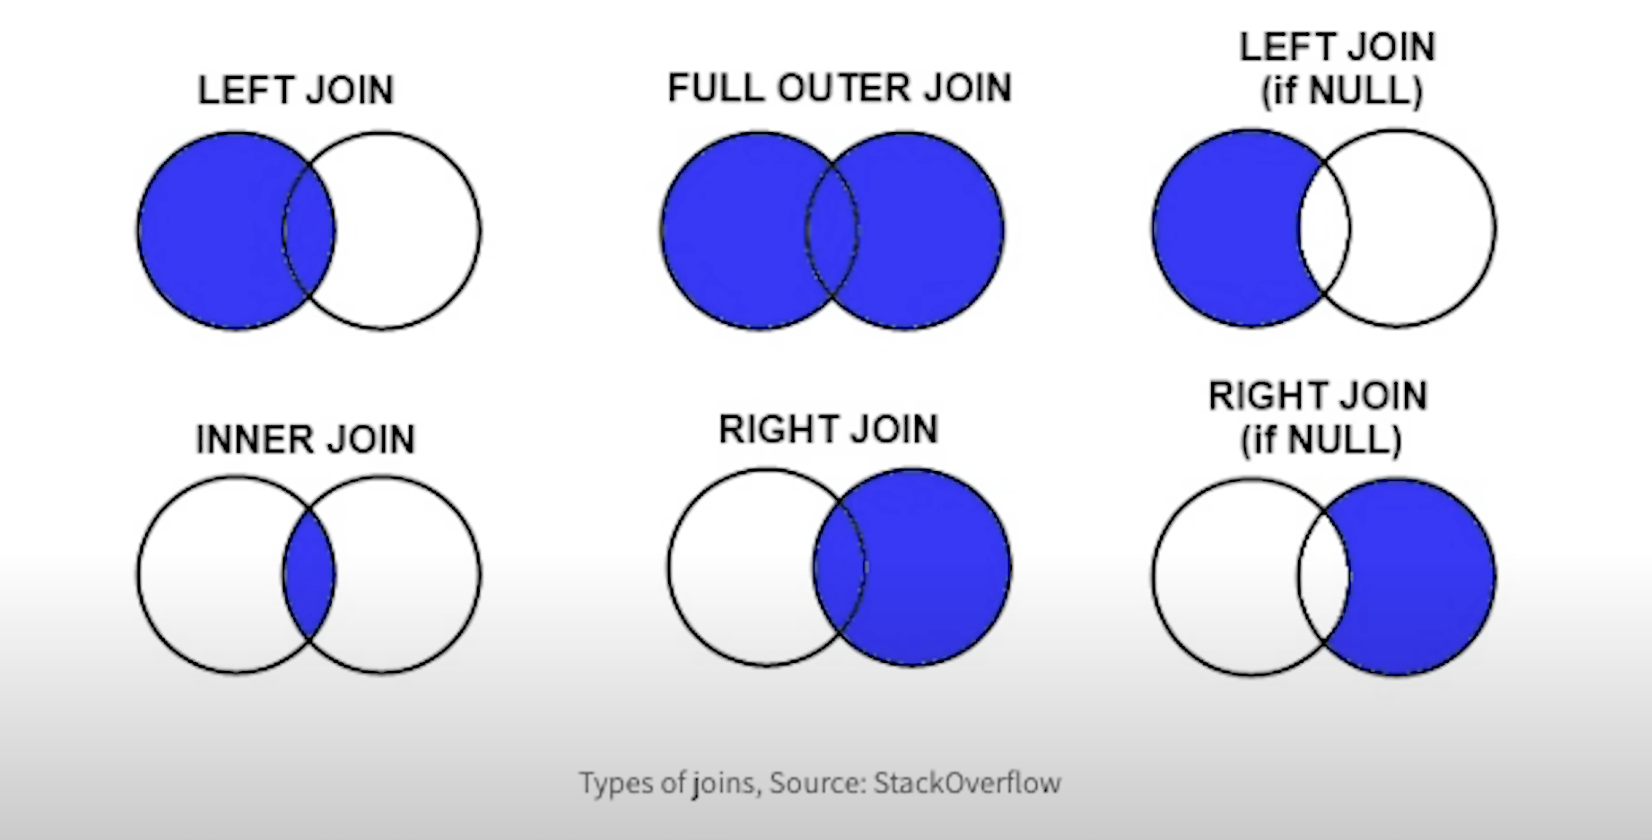

In [34]:
# NOC (National Olympic Committee) represents the country code where athletes competed
# Let's expand these 3-letter codes to full country names using reference data

# Check current data structure
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [35]:
# Load country code mapping data
countries = pd.read_csv('https://github.com/KeithGalli/complete-pandas-tutorial/raw/refs/heads/master/data/noc_regions.csv')

# Rename NOC column to be more descriptive for the merge operation
countries.rename(columns={'NOC': 'short_format'}, inplace=True)
countries.head()

,short_format,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [36]:
# Perform LEFT JOIN to add full country names to our biography data
# left_on: column in left DataFrame (bios_new)
# right_on: column in right DataFrame (countries)
# how='left': keep all records from bios_new, even if no match in countries
bios_new = pd.merge(bios_new, countries, left_on='born_country', right_on='short_format', how='left')

In [37]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   athlete_id       145500 non-null  int64         
 1   name             145500 non-null  object        
 2   born_date        143693 non-null  datetime64[ns]
 3   born_city        110908 non-null  object        
 4   born_region      110908 non-null  object        
 5   born_country     110908 non-null  object        
 6   NOC              145499 non-null  object        
 7   height_cm        106651 non-null  float64       
 8   weight_kg        102070 non-null  float64       
 9   died_date        33940 non-null   object        
 10  born_year        143693 non-null  float64       
 11  height_category  106651 non-null  category      
 12  weight_category  145500 non-null  object        
 13  short_format     110639 non-null  object        
 14  region           110

In [38]:
# Rename the merged column to be more descriptive
bios_new.rename(columns={'region':'born_country_full'}, inplace=True)

In [39]:
# Clean up unnecessary columns from the merge
bios_new.drop(columns=['short_format','notes'], inplace=True)

In [40]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_year,height_category,weight_category,born_country_full
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886.0,NaN,Heavyweight,France
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969.0,Average,Middleweight,France
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898.0,Average,Middleweight,France
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895.0,Average,Lightweight,France
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878.0,NaN,Heavyweight,UK


In [41]:
# Find athletes who competed for a different country than where they were born
# This reveals cases of naturalization, dual citizenship, or other circumstances
bios_new.loc[bios_new['NOC'] != bios_new['born_country_full'],['name','NOC','born_country_full']]

,name,NOC,born_country_full
4,Albert Canet,France,UK
12,J. Defert,France,NaN
13,Étienne Durand,France,NaN
16,Guy Forget,France,Morocco
27,"Guy, Baron Lejeune",France,NaN
...,...,...,...
145491,Matthew Wepke,Jamaica,NaN
145493,Landysh Falyakhova,ROC,Russia
145495,Polina Luchnikova,ROC,Russia
145496,Valeriya Merkusheva,ROC,Russia


In [42]:
# Create separate DataFrames for Colombia and Italy-born athletes
col = bios_new.loc[bios_new['born_country_full']=='Colombia'].copy()
ita = bios_new.loc[bios_new['born_country_full']=='Italy'].copy()

In [43]:
# Concatenate (stack) the two DataFrames vertically
# pd.concat() combines DataFrames along an axis (default axis=0 for vertical stacking)
bios_col_ita = pd.concat([col, ita])
bios_col_ita

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_year,height_category,weight_category,born_country_full
1323,1330,Eduardo Barragán,1951-07-01,Cartagena del Chairá,Caquetá,COL,Colombia,160.0,52.0,NaN,1951.0,Short,Lightweight,Colombia
1325,1332,Prudencio Cardona,1951-12-22,San Basilio de Palenque,Bolívar,COL,Colombia,168.0,46.0,2019-08-04,1951.0,Average,Lightweight,Colombia
1326,1333,Edwin Cassiani,1972-10-28,Palenque,Casanare,COL,Colombia,182.0,64.0,NaN,1972.0,Average,Middleweight,Colombia
1327,1334,Dairo Esalas,1975-01-17,San Onofre,Sucre,COL,Colombia,170.0,63.0,NaN,1975.0,Average,Lightweight,Colombia
1330,1337,Jorge Julio,1969-04-04,El Retén,Magdalena,COL,Colombia,169.0,54.0,NaN,1969.0,Average,Lightweight,Colombia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144807,148508,Arianna Valcepina,1994-05-09,Sondalo,Sondrio,ITA,Italy,170.0,56.0,NaN,1994.0,Average,Lightweight,Italy
144808,148509,Andrea Cassinelli,1993-09-02,Moncalieri,Torino,ITA,Italy,185.0,80.0,NaN,1993.0,Average,Middleweight,Italy
144809,148510,Pietro Sighel,1999-07-15,Trento,Trento,ITA,Italy,171.0,66.0,NaN,1999.0,Average,Lightweight,Italy
144810,148511,Luca Spechenhauser,2000-12-14,Sondalo,Sondrio,ITA,Italy,NaN,NaN,NaN,2000.0,NaN,Heavyweight,Italy


## Handling Null Values

In [44]:
# Create a copy to practice null value handling without affecting original data
coffee_nans = coffee.copy()
coffee_nans

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [45]:
# Introduce null values for demonstration purposes
# Set specific rows to NaN (Not a Number) to simulate missing data
coffee_nans.loc[[0,1], 'Units Sold'] = np.nan
coffee_nans.head(3)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,NaN
1,Monday,Latte,NaN
2,Tuesday,Espresso,30.0


In [46]:
# Check for null values across all columns
# Returns count of null values per column
coffee_nans.isna().sum()

Day            0
Coffee Type    0
Units Sold     2
dtype: int64

In [47]:
# METHOD 1: Fill null values with specific values per column
# Dictionary allows different fill values for different columns
coffee_nans.fillna({'Units Sold':0}, inplace=True)
coffee_nans

,Day,Coffee Type,Units Sold
0,Monday,Espresso,0.0
1,Monday,Latte,0.0
2,Tuesday,Espresso,30.0
3,Tuesday,Latte,20.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0


In [48]:
# Re-introduce NaN values to demonstrate other methods
coffee_nans.loc[[0,1], 'Units Sold'] = np.nan

In [49]:
# METHOD 2: Filter to see only rows WITH null values
# .isna() returns boolean mask indicating null values
coffee_nans.loc[coffee_nans['Units Sold'].isna()]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,NaN
1,Monday,Latte,NaN


In [50]:
# Filter to see only rows WITHOUT null values
# .notna() is the opposite of .isna()
coffee_nans.loc[coffee_nans['Units Sold'].notna()]

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30.0
3,Tuesday,Latte,20.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0
10,Saturday,Espresso,45.0
11,Saturday,Latte,35.0


In [51]:
# METHOD 3: Remove rows with null values
# subset parameter specifies which columns to check for nulls
# Only drops rows where 'Units Sold' is NaN, ignores nulls in other columns
coffee_nans.dropna(subset=['Units Sold'], inplace=True)
coffee_nans

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30.0
3,Tuesday,Latte,20.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0
10,Saturday,Espresso,45.0
11,Saturday,Latte,35.0


In [52]:
coffee_nans

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30.0
3,Tuesday,Latte,20.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0
10,Saturday,Espresso,45.0
11,Saturday,Latte,35.0


## Aggregating Data

In [53]:
# Count frequency of each country in the dataset
# value_counts() returns counts in descending order by default
bios_new['born_country_full'].value_counts()

born_country_full
USA                        9641
Germany                    6891
UK                         5792
France                     5143
Italy                      4709
                           ... 
Antigua                       2
Mauritania                    2
Virgin Islands, British       2
Seychelles                    1
Cook Islands                  1
Name: count, Length: 201, dtype: int64

In [54]:
# Filter for Colombia and then count regions within Colombia
# This shows the distribution of Colombian athletes across different regions
bios_new.loc[bios_new['born_country_full'] == 'Colombia', 'born_region'].value_counts()

born_region
Antioquia                     139
Valle del Cauca                96
Bogotá                         68
Atlántico                      32
Boyacá                         22
Bolívar                        17
Santander                      17
Cauca                          13
Tolima                         13
Cundinamarca                   13
Risaralda                      12
Magdalena                      11
Caquetá                         7
Caldas                          6
Chocó                           6
Córdoba                         5
Nariño                          5
Norte de Santander              5
Cesar                           5
Meta                            5
La Guajira                      4
Sucre                           3
Quindío                         3
Huila                           3
San Andrés and Providencia      2
Casanare                        1
Name: count, dtype: int64

In [55]:
# GROUP BY operations: Split-Apply-Combine pattern
# Group by coffee type and sum the units sold for each type
# This shows total sales volume per coffee variety
coffee.groupby(['Coffee Type'])['Units Sold'].sum()

Coffee Type
Espresso    265
Latte       195
Name: Units Sold, dtype: int64

In [56]:
# Count number of people in each height category
# .size() counts all rows in each group (including NaN values)
# Alternative: .count() would exclude NaN values
bios_new.groupby(['height_category']).size()

/var/folders/47/bpf5ysjn14v0z5bjxjd12wzc0000gn/T/ipykernel_3768/3905761000.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bios_new.groupby(['height_category']).size()


height_category
Short      16575
Average    70747
Tall       19329
dtype: int64

In [57]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   athlete_id         145500 non-null  int64         
 1   name               145500 non-null  object        
 2   born_date          143693 non-null  datetime64[ns]
 3   born_city          110908 non-null  object        
 4   born_region        110908 non-null  object        
 5   born_country       110908 non-null  object        
 6   NOC                145499 non-null  object        
 7   height_cm          106651 non-null  float64       
 8   weight_kg          102070 non-null  float64       
 9   died_date          33940 non-null   object        
 10  born_year          143693 non-null  float64       
 11  height_category    106651 non-null  category      
 12  weight_category    145500 non-null  object        
 13  born_country_full  110636 non-null  object  

In [58]:
# Count athletes born in each year
# This shows the temporal distribution of birth years in the dataset
bios_new.groupby(['born_year']).size()

born_year
1828.0      1
1831.0      2
1833.0      1
1836.0      1
1837.0      1
         ... 
2005.0    163
2006.0     17
2007.0      3
2008.0      3
2009.0      1
Length: 177, dtype: int64

## Advanced Functionality

In [59]:
# SHIFT operation: Move data by specified number of periods
# shift(2) moves values down by 2 rows, creating lag variables
# This simulates "yesterday's revenue" (though it's actually 2 days ago in this example)
coffee_new['Yesterday Revenue'] = coffee_new['Revenue'].shift(2)

# Calculate percentage change from previous period
# Formula: (current_value / previous_value) * 100
# Note: First 2 rows will be NaN due to the shift operation
coffee_new['Percentage Change'] = coffee_new['Revenue'] / coffee_new['Yesterday Revenue'] * 100
coffee_new

,Day,Coffee Type,Units Sold,Price,Revenue,Yesterday Revenue,Percentage Change
0,Monday,Espresso,25,3.99,99.75,NaN,NaN
1,Monday,Latte,15,4.99,74.85,NaN,NaN
2,Tuesday,Espresso,30,3.99,119.70,99.75,120.000000
3,Tuesday,Latte,20,4.99,99.80,74.85,133.333333
4,Wednesday,Espresso,35,3.99,139.65,119.70,116.666667
5,Wednesday,Latte,25,4.99,124.75,99.80,125.000000
6,Thursday,Espresso,40,3.99,159.60,139.65,114.285714
7,Thursday,Latte,30,4.99,149.70,124.75,120.000000
8,Friday,Espresso,45,3.99,179.55,159.60,112.500000
9,Friday,Latte,35,4.99,174.65,149.70,116.666667


In [60]:
# RANKING: Assign ranks based on column values
# ascending=False means highest values get lowest ranks (1st place = tallest person)
# Default handles ties by assigning average ranks
bios_new['height_rank'] = bios_new['height_cm'].rank(ascending=False)

# Display the tallest people with their rankings
# Sort by height_rank to see the ranking order clearly
bios_new.loc[:, ['name', 'born_country_full', 'height_cm', 'height_rank']].sort_values('height_rank', ascending=True).head()

,name,born_country_full,height_cm,height_rank
89070,Yao Ming,China,226.0,1.0
6978,Arvydas Sabonis,Lithuania,223.0,2.5
5781,Tommy Burleson,USA,223.0,2.5
120266,Zhang Zhaoxu,China,221.0,5.0
89075,Roberto Dueñas,Spain,221.0,5.0


In [62]:
# CUMULATIVE operations: Running total of values
# cumsum() calculates running sum from first row to current row
# Useful for tracking cumulative metrics over time
coffee_new['Cumulative Revenue'] = coffee_new['Revenue'].cumsum()
coffee_new

,Day,Coffee Type,Units Sold,Price,Revenue,Yesterday Revenue,Percentage Change,Cumulative Revenue
0,Monday,Espresso,25,3.99,99.75,NaN,NaN,99.75
1,Monday,Latte,15,4.99,74.85,NaN,NaN,174.60
2,Tuesday,Espresso,30,3.99,119.70,99.75,120.000000,294.30
3,Tuesday,Latte,20,4.99,99.80,74.85,133.333333,394.10
4,Wednesday,Espresso,35,3.99,139.65,119.70,116.666667,533.75
5,Wednesday,Latte,25,4.99,124.75,99.80,125.000000,658.50
6,Thursday,Espresso,40,3.99,159.60,139.65,114.285714,818.10
7,Thursday,Latte,30,4.99,149.70,124.75,120.000000,967.80
8,Friday,Espresso,45,3.99,179.55,159.60,112.500000,1147.35
9,Friday,Latte,35,4.99,174.65,149.70,116.666667,1322.00
